In [1]:
cd ..

/Users/mushahid/Desktop/ProjectFInal/UnsupGenModbyMPS


In [2]:
%load_ext autoreload

import matplotlib.pyplot as plt
import numpy as np
import pennylane as qml
from pennylane import numpy as pnp
import jax.numpy as jnp
import optax
import jax
import mps_circuit_helpers
import mps_circuit
import metrics

from tqdm import tqdm
from jax.config import config
config.update("jax_enable_x64", True)
from MPScumulant import MPS_c


In [3]:
import itertools
import numpy as np

def bars_and_stripes(rows, cols):
    
    data = [] 
    
    for h in itertools.product([0,1], repeat=cols):
        pic = np.repeat([h], rows, 0)
        data.append(pic.ravel().tolist())
          
    for h in itertools.product([0,1], repeat=rows):
        pic = np.repeat([h], cols, 1)
        data.append(pic.ravel().tolist())
        
    data = np.unique(np.asarray(data), axis=0)
    for i in range(len(data)):
        for j in range(len(data[i])):
            if data[i][j] == 1:
                data[i][j] = True
            else:
                data[i][j] = False
    return data

In [4]:
data = bars_and_stripes(4,3)
data_shaped = []
for i in range(len(data)):
    print(data[i].shape)
    data_shaped.append(data[i].reshape(12,))
data_shaped = pnp.array(data_shaped)

(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)


In [5]:
# weights = jnp.array(pnp.random.normal(size=(88, 15), requires_grad=True))
import random
random.uniform(0, 1)

weights1 = []
for i in range(88):
    t = np.random.uniform(0, 1, size=15)
    t = np.array(t)
    t = t * np.pi
    t = jnp.array(t)
    weights1.append(t)
weight1 = jnp.array(weights1)

In [6]:
len(weights1[0])

15

In [7]:
wires = 12
dev = qml.device("default.qubit", wires=wires)
# weights = jnp.array(pnp.random.normal(size=(45, 1), requires_grad=True))

@qml.qnode(dev, interface="jax")
def random_initialized_circuit(weights):
    i = 0
    while i < 11:
        qml.SpecialUnitary(weights[i], wires=[i, i + 1])
        i += 1
    w = 0
    while i < 22:
        qml.SpecialUnitary(weights[i], wires=[w, w + 1])
        w += 1
        i += 1    
    
    for x in range(wires - 1):
        for j in range(x + 1, wires):
            qml.SpecialUnitary(weights[i], wires=[x, j])
            i += 1
    return qml.probs(wires=list(range(wires)))

@jax.jit
def loss(weights):
    probs = random_initialized_circuit(weights)
    return metrics.kl_divergence_synergy_paper(2**12, probs)

n_its = 10000

loss_track = []
opt_exc = optax.adam(0.01)
opt_state = opt_exc.init(weights1)
for it in tqdm(range(n_its)):
    grads = jax.grad(loss)(weights1)
    updates, opt_state = opt_exc.update(grads, opt_state)

    weights1 = optax.apply_updates(weights1, updates)
    loss_track.append(loss(weights1))


100%|██████████| 10000/10000 [33:01<00:00,  5.05it/s] 


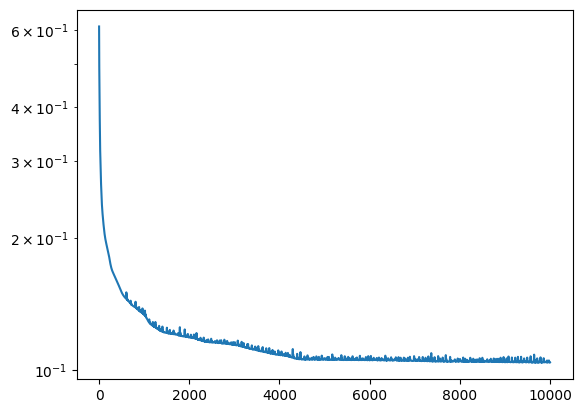

In [13]:
plt.plot(loss_track)
plt.yscale('log')

In [131]:
samples = random_initialized_circuit(weights)
metrics.plot_top_samples(samples)

22
Frequency : 1


ValueError: cannot reshape array of size 1 into shape (4,4)

In [9]:
loss_track

[]